In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base_ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')

In [3]:
X = base_ordinal.drop(['SalePrice'], axis=1).values
y = base_ordinal.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 82)

In [6]:
X.shape[1]

82

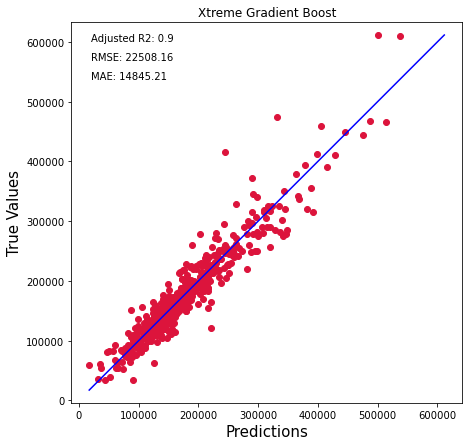

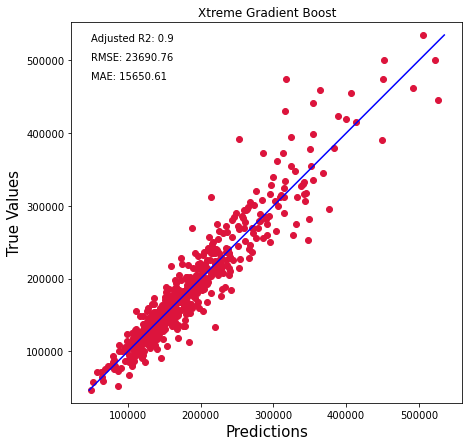

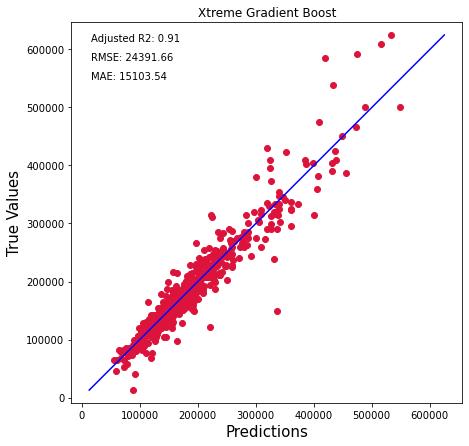

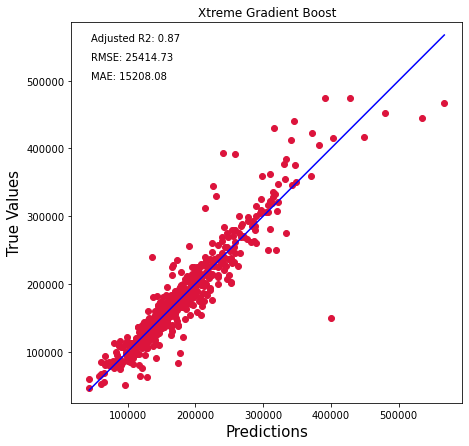

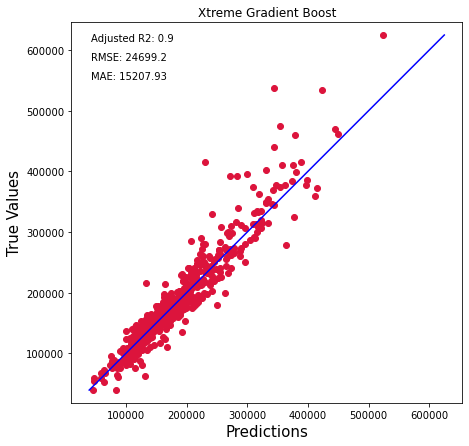

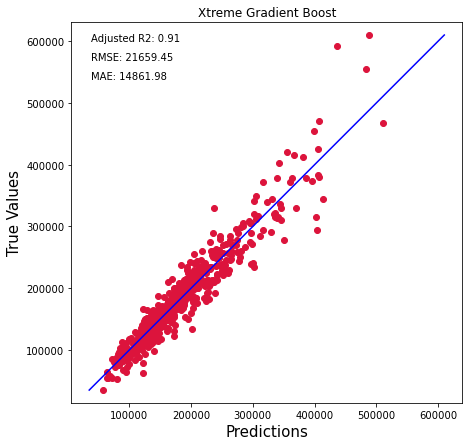

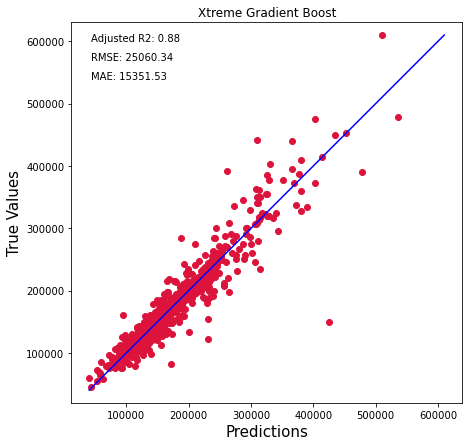

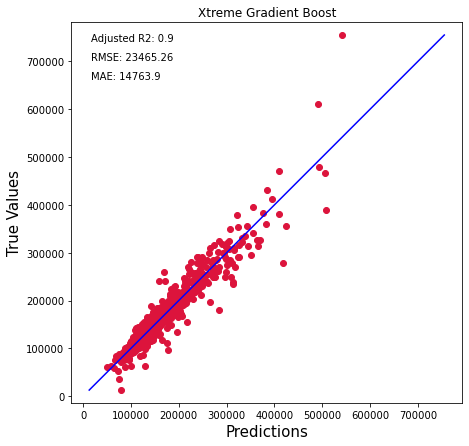

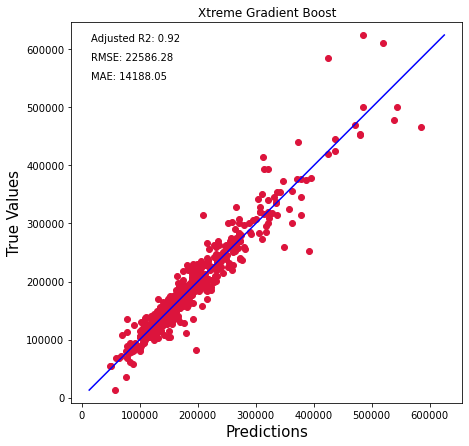

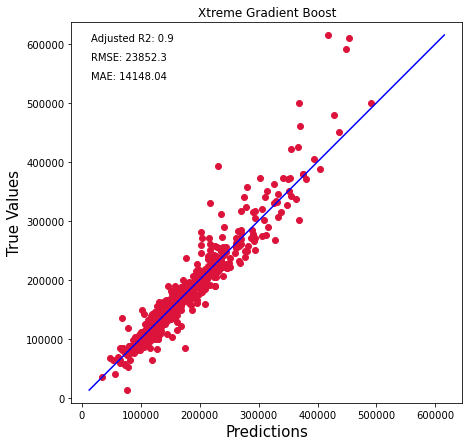

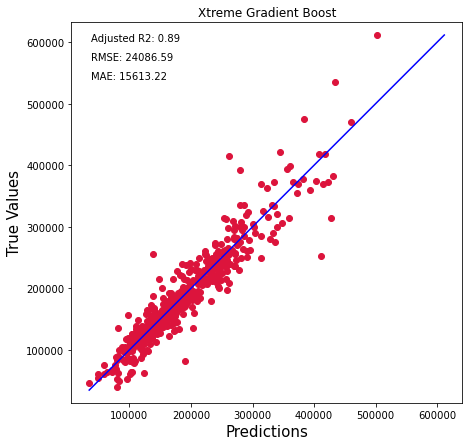

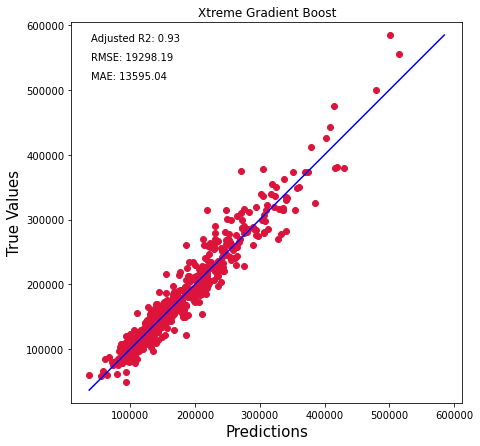

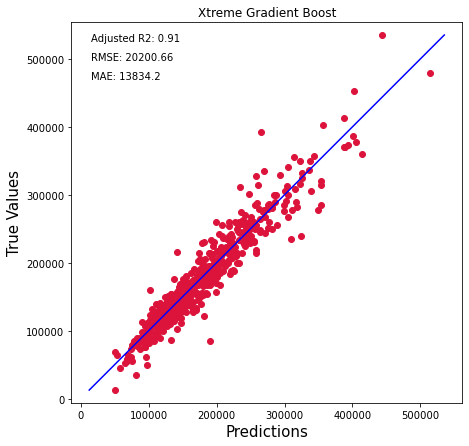

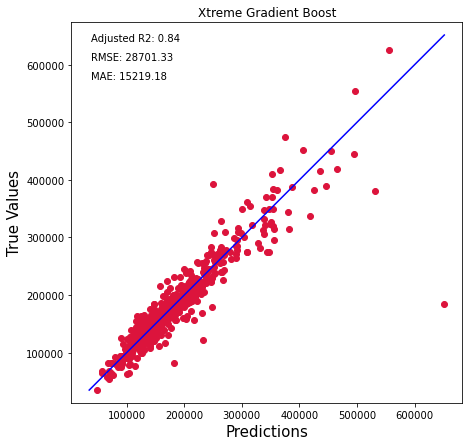

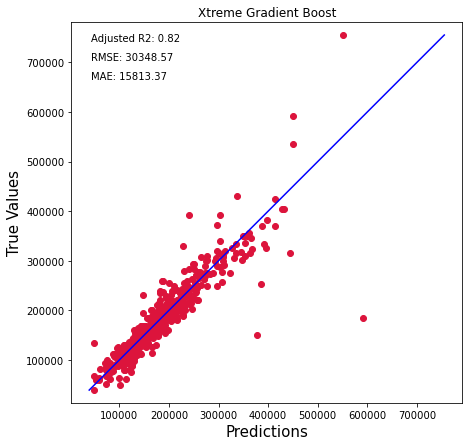

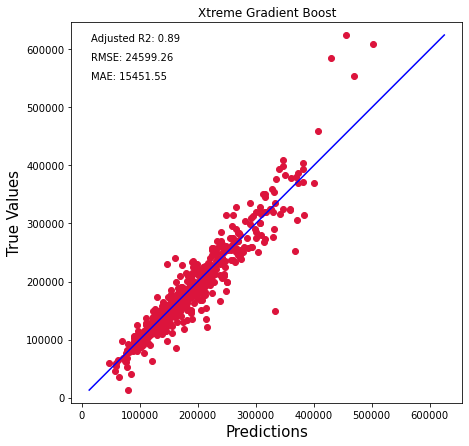

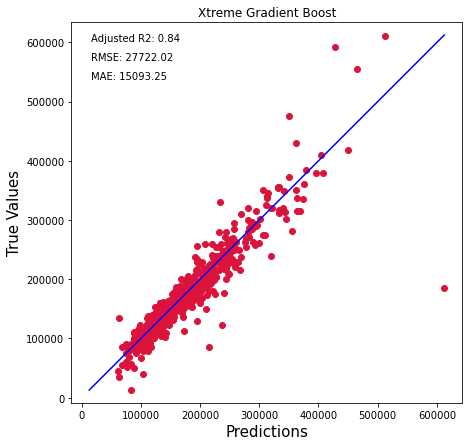

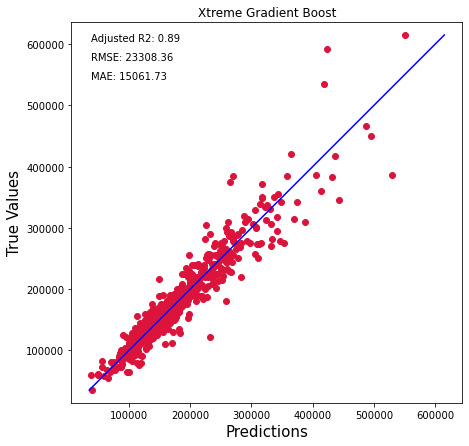

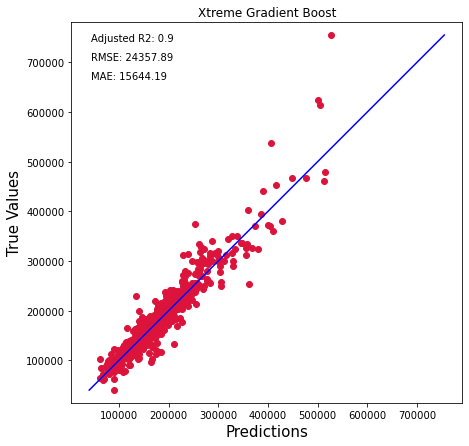

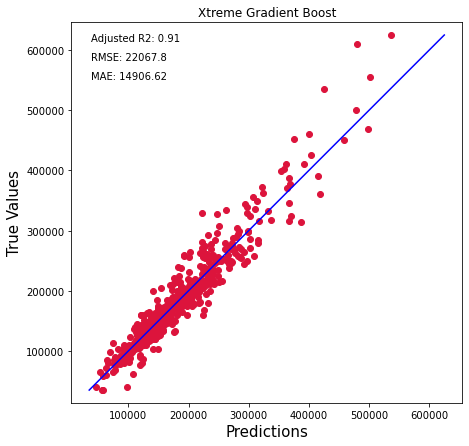

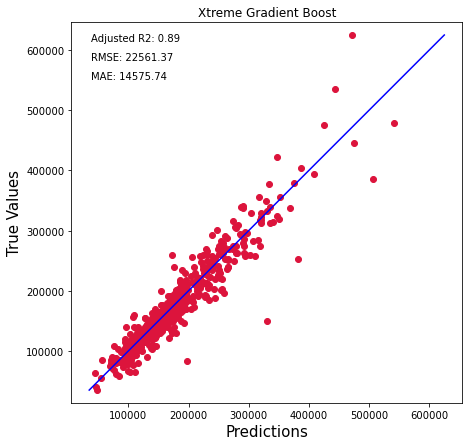

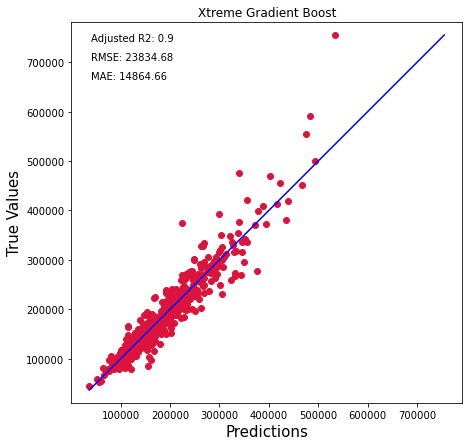

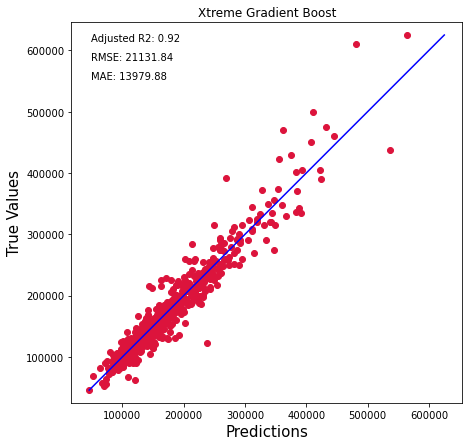

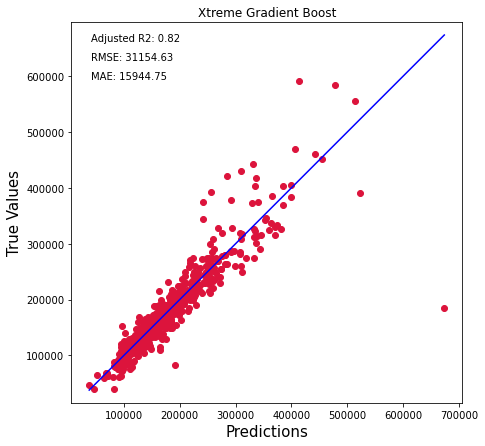

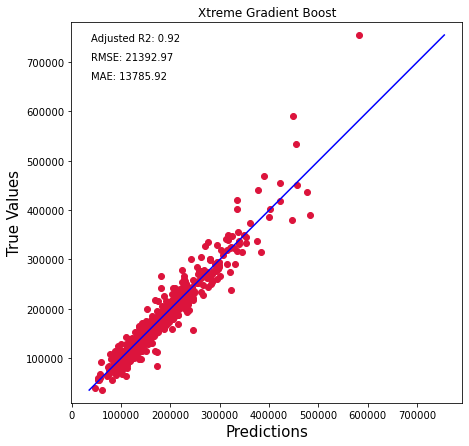

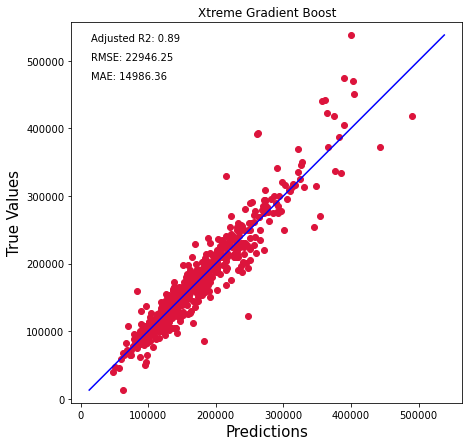

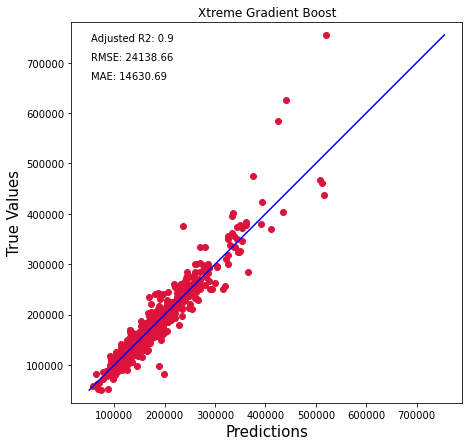

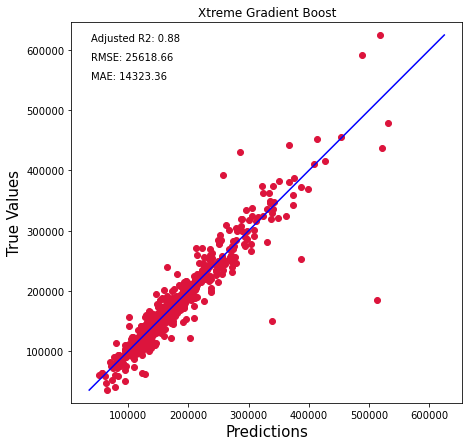

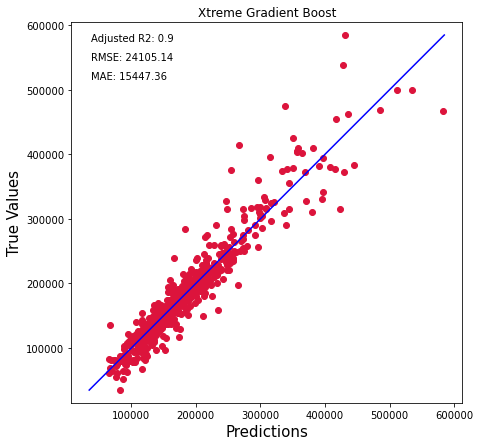

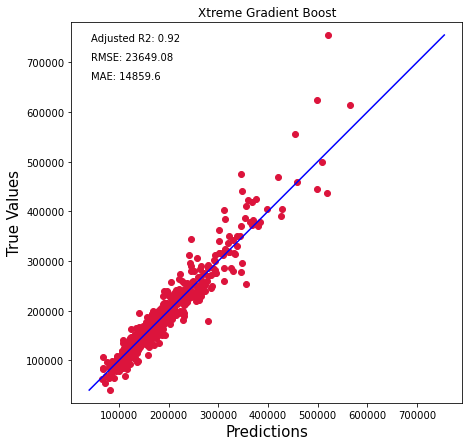

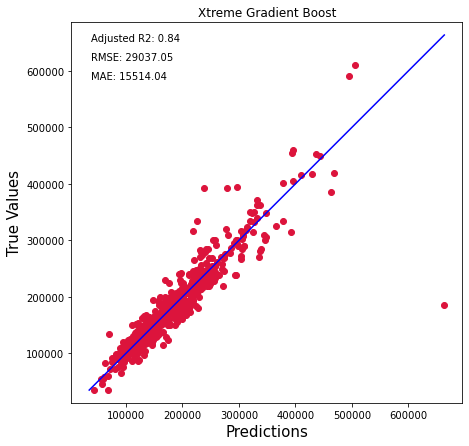

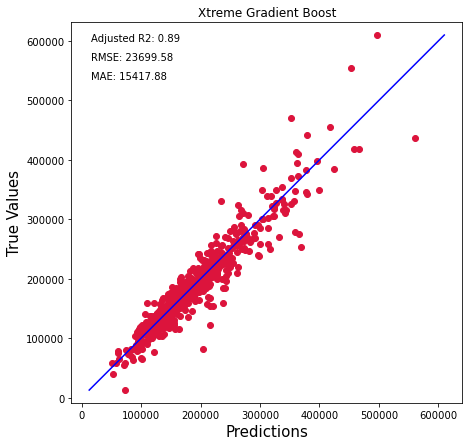

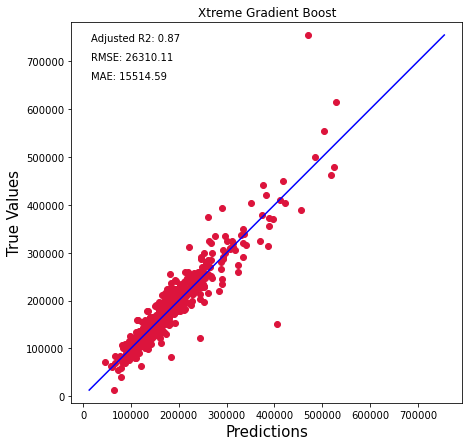

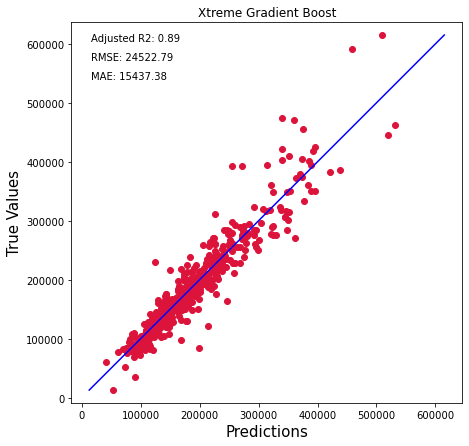

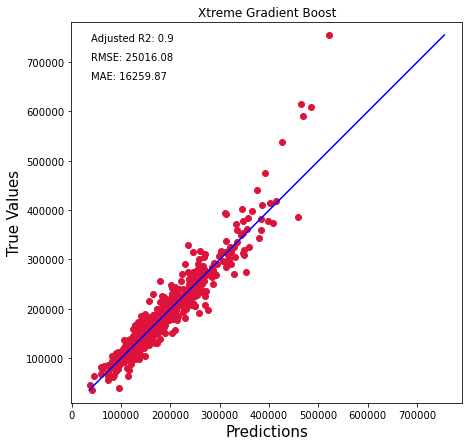

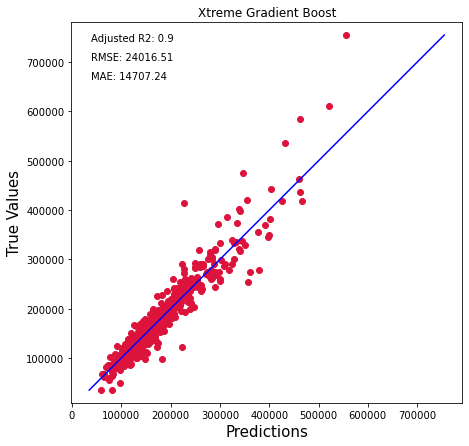

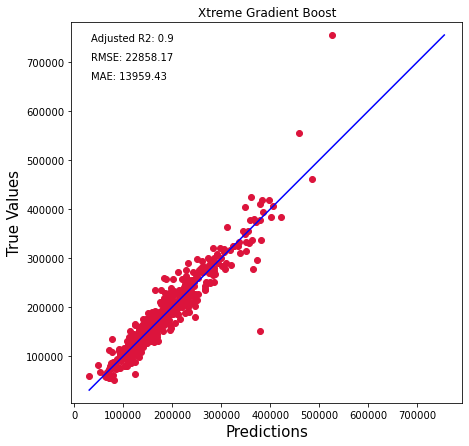

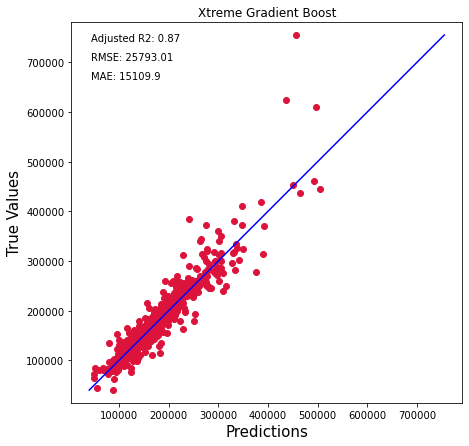

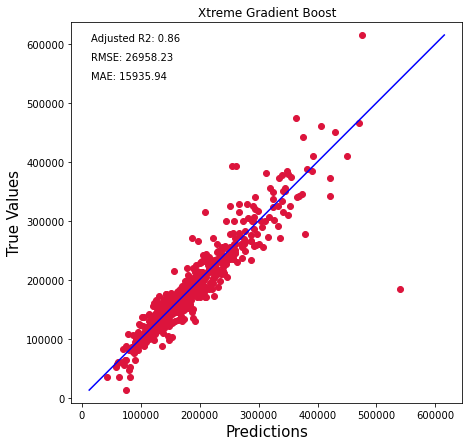

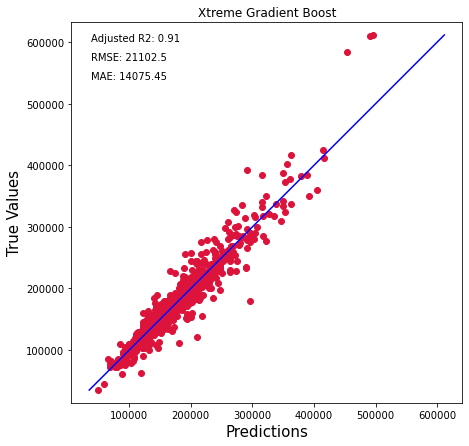

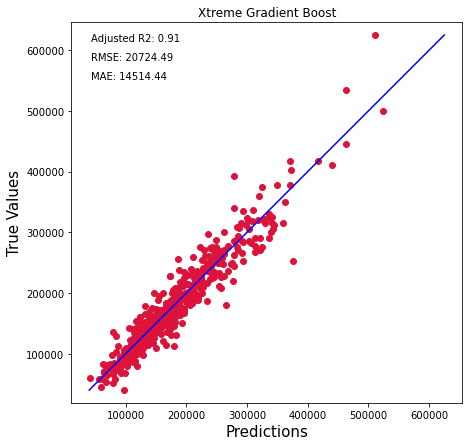

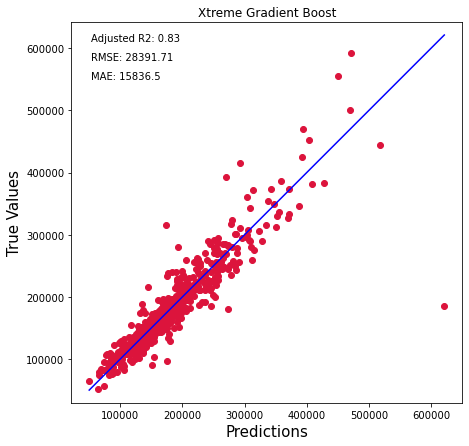

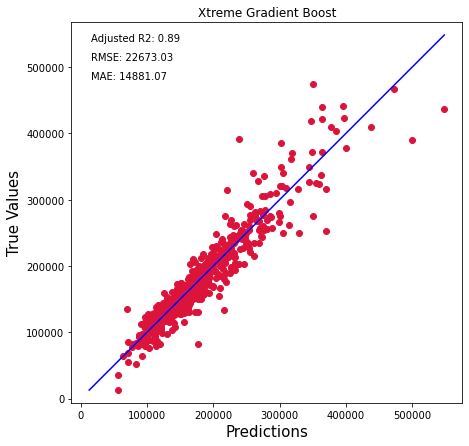

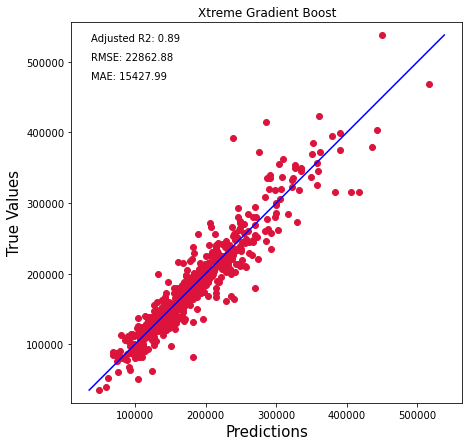

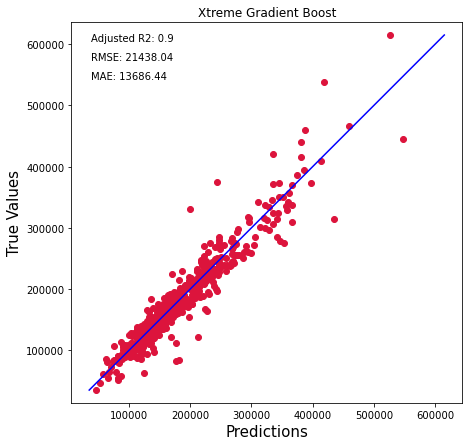

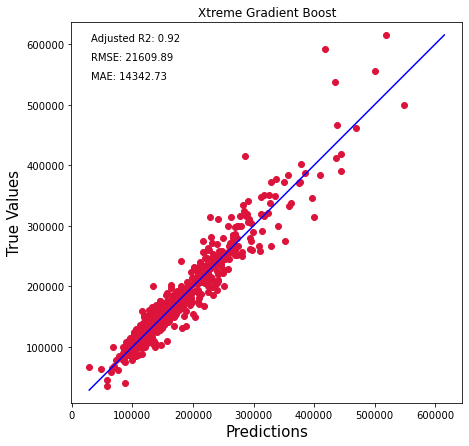

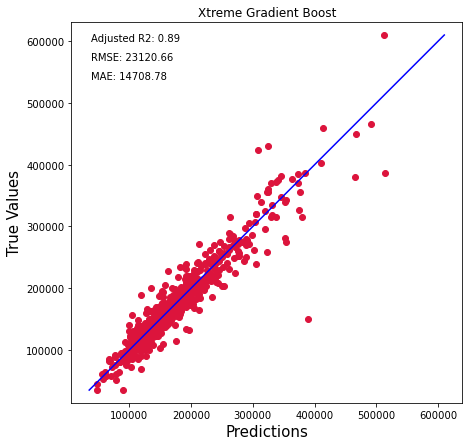

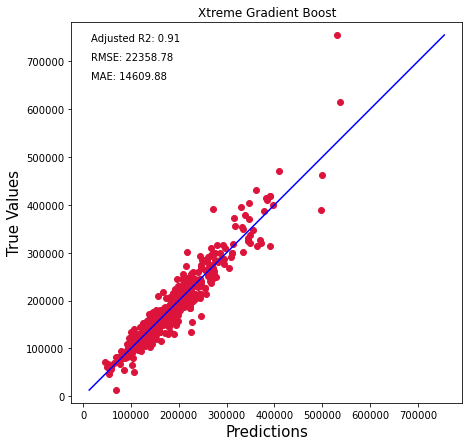

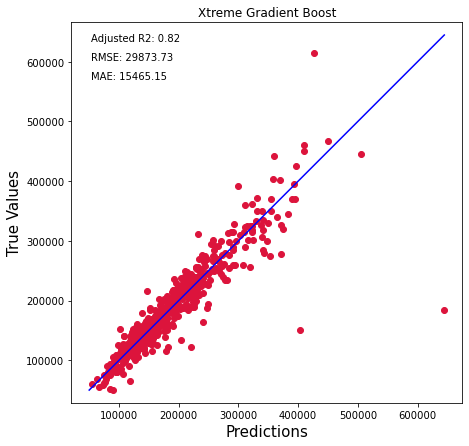

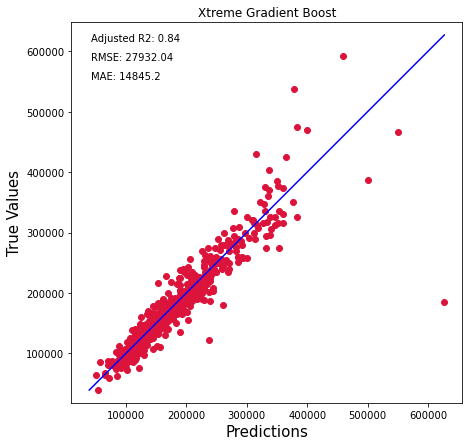

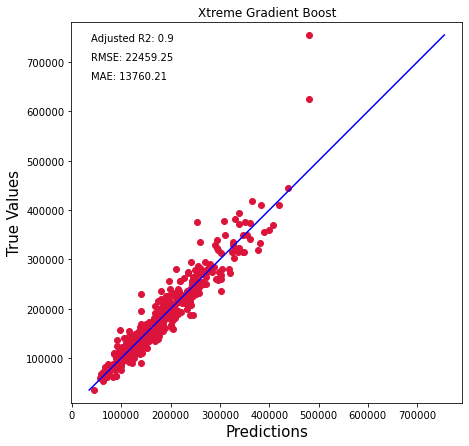

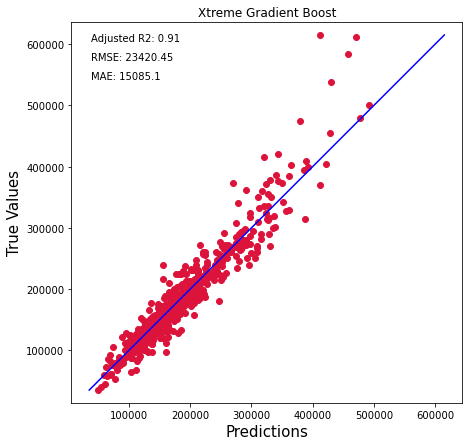

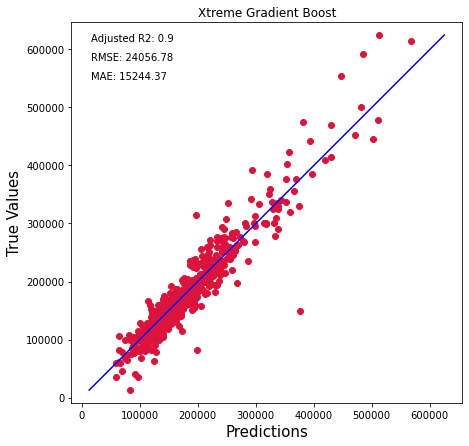

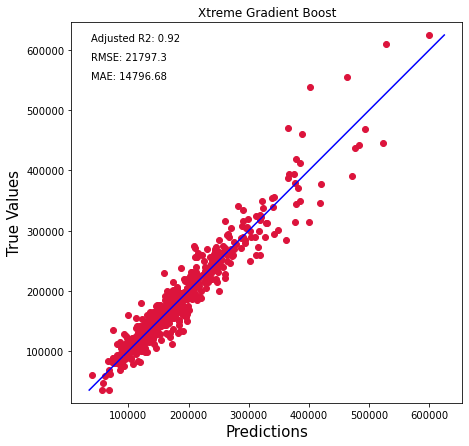

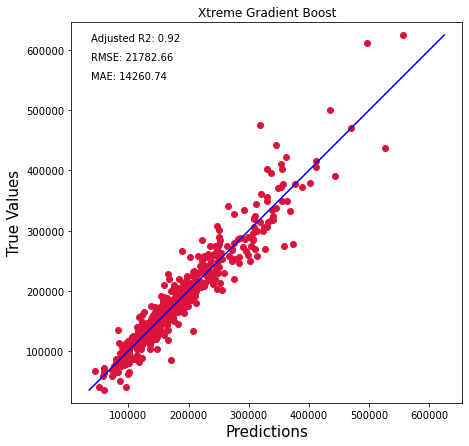

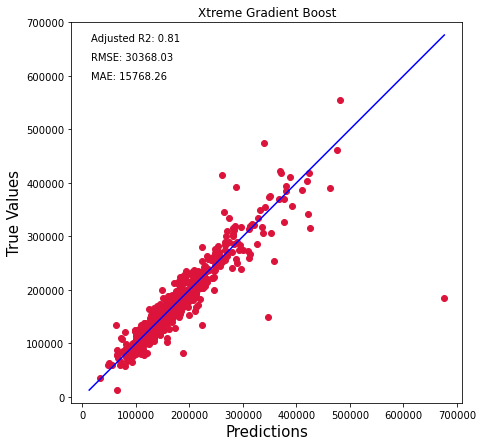

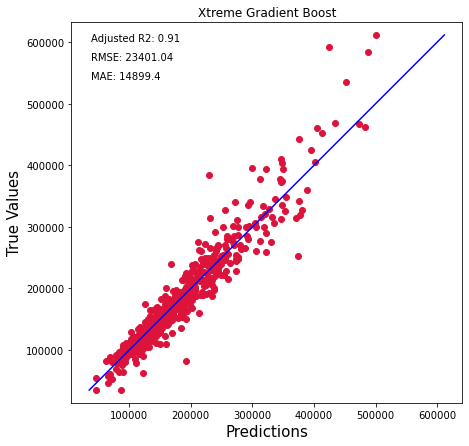

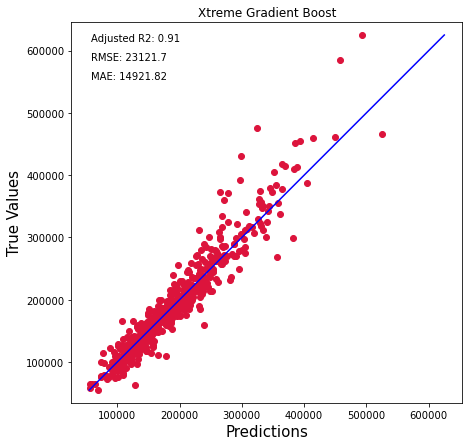

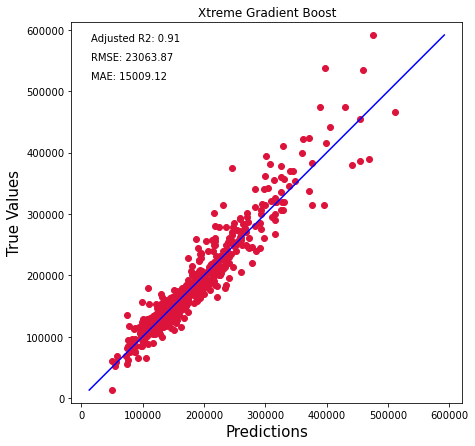

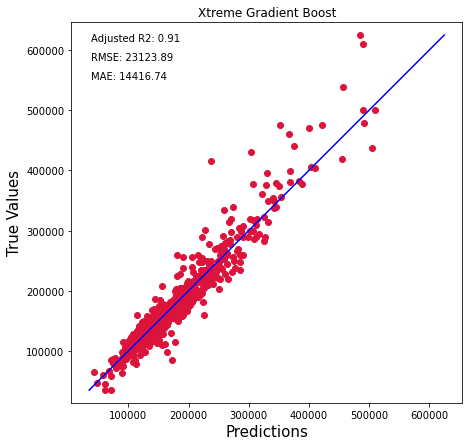

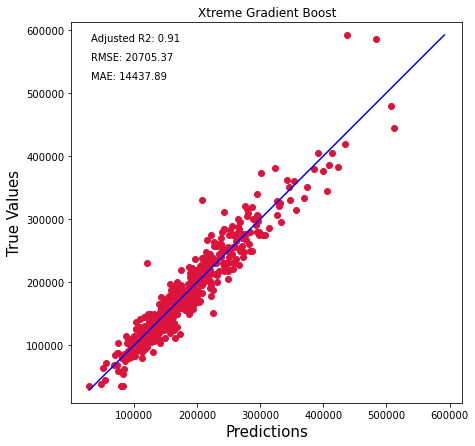

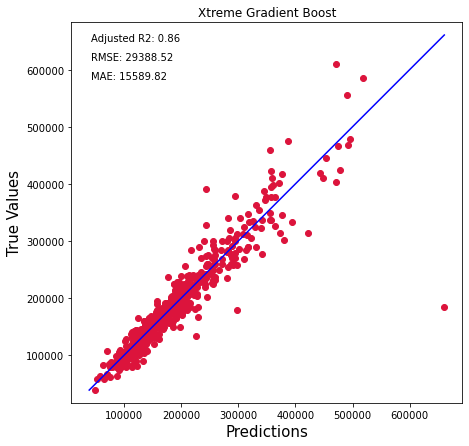

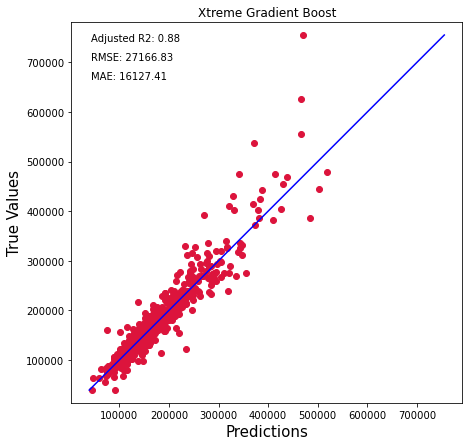

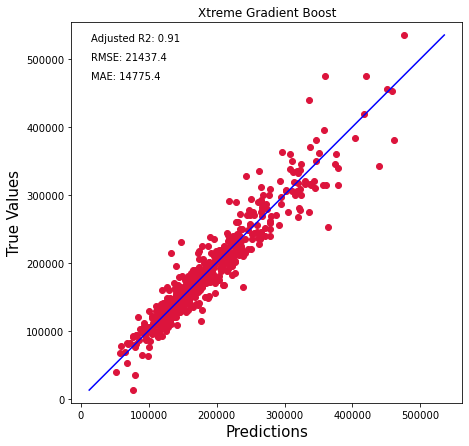

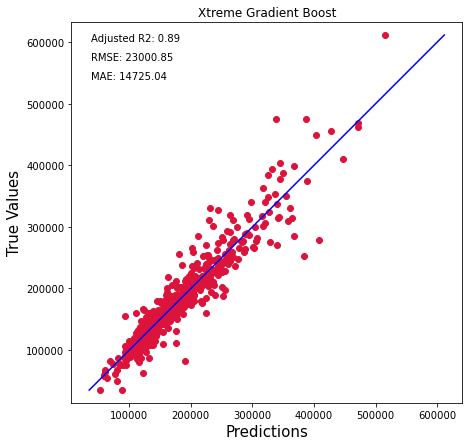

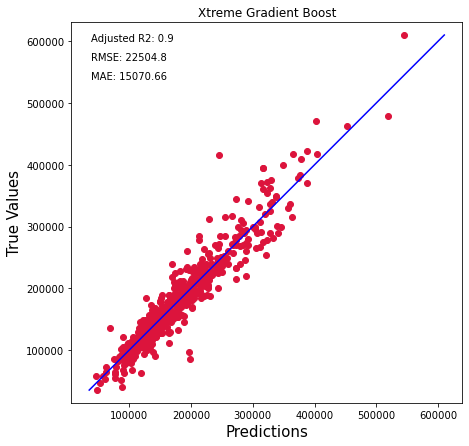

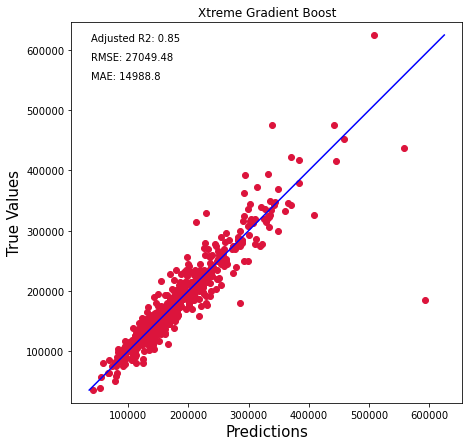

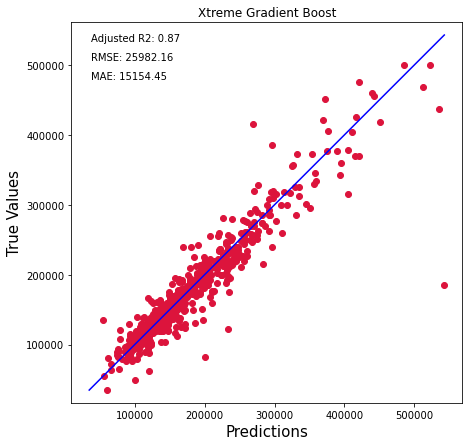

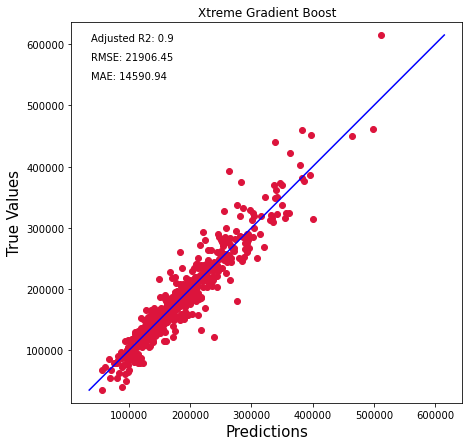

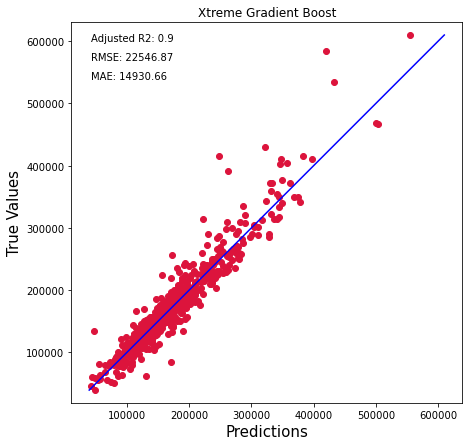

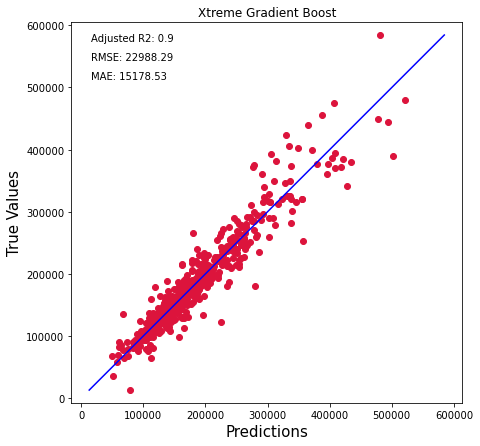

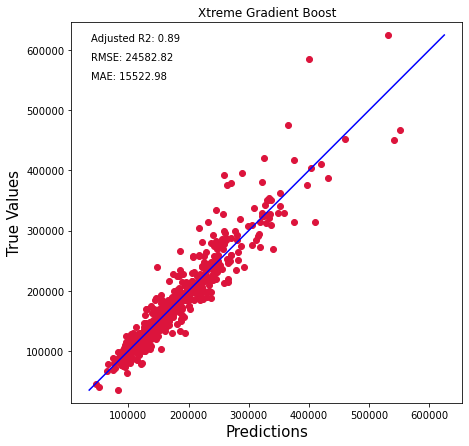

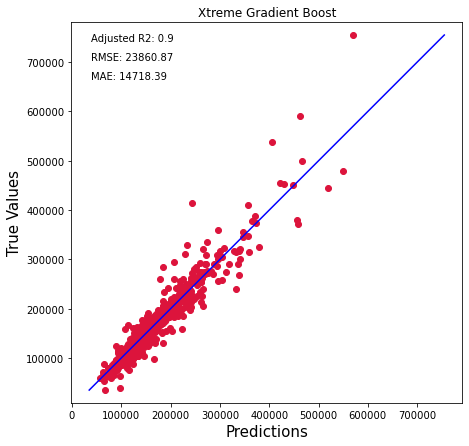

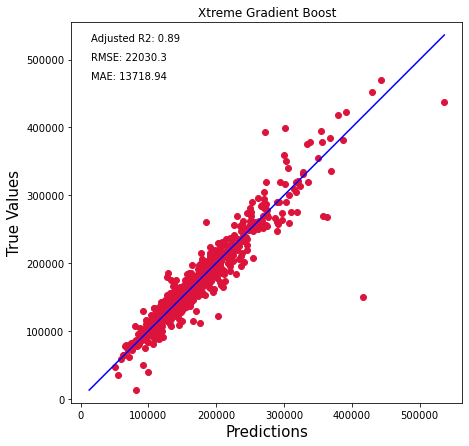

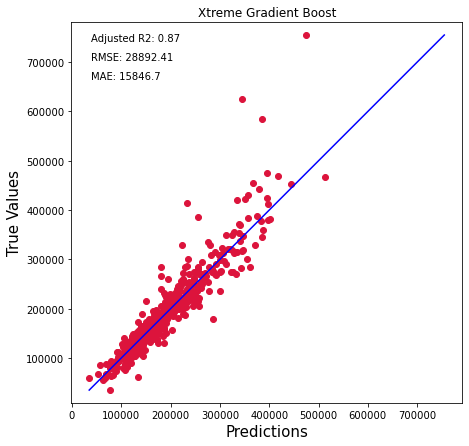

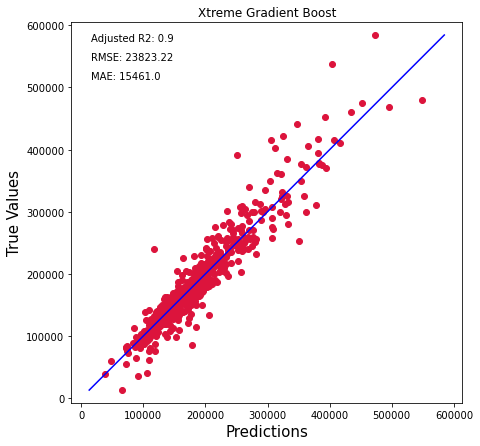

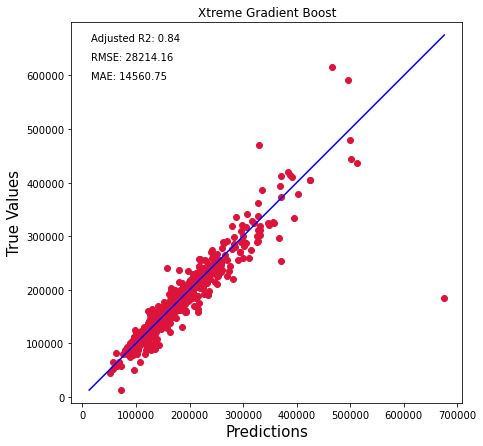

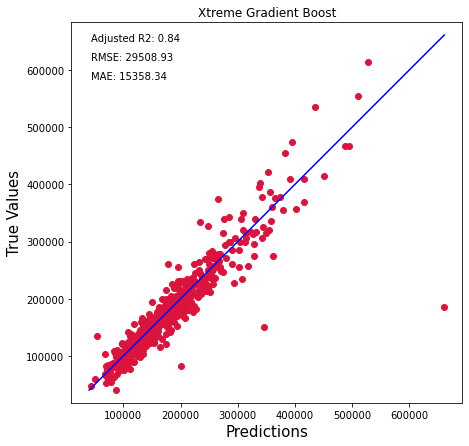

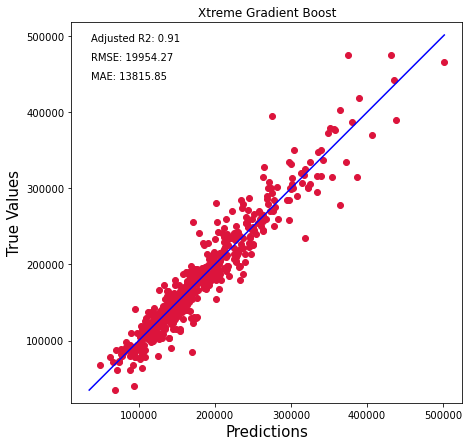

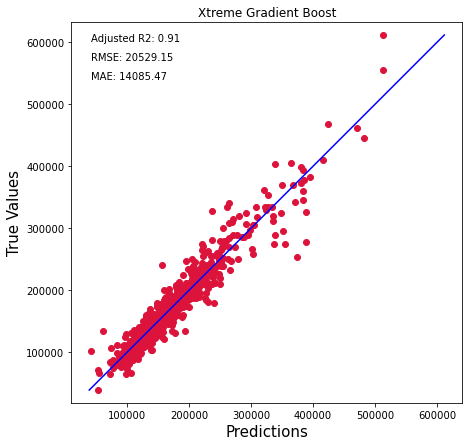

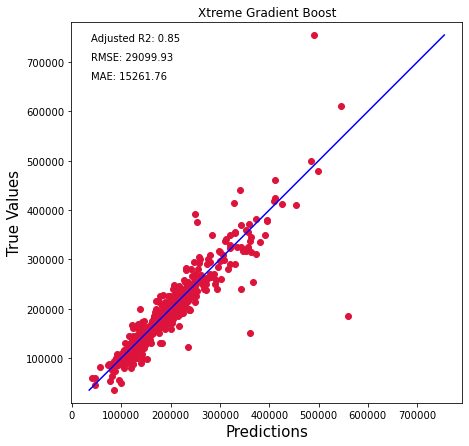

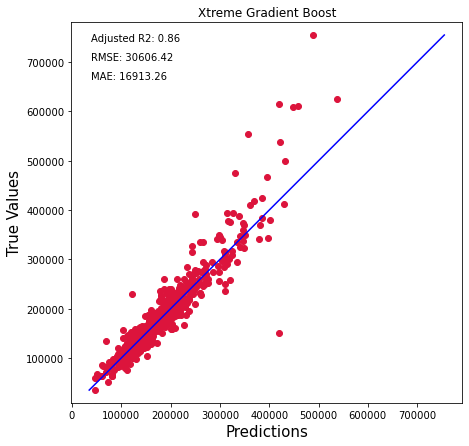

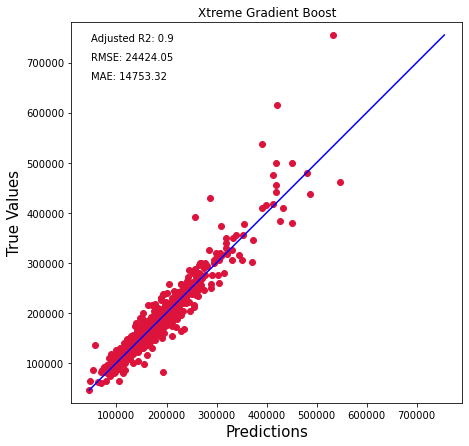

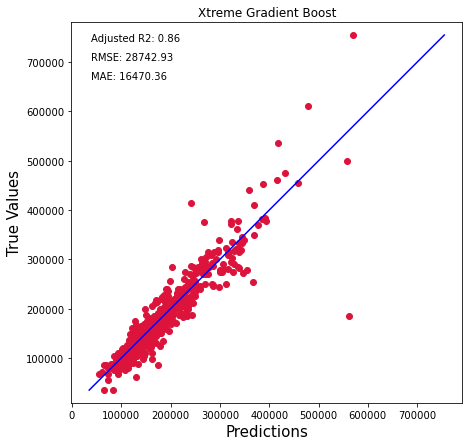

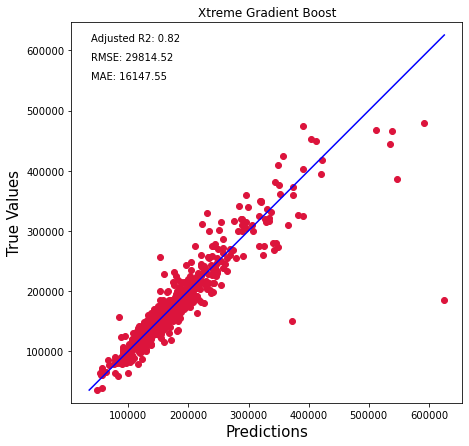

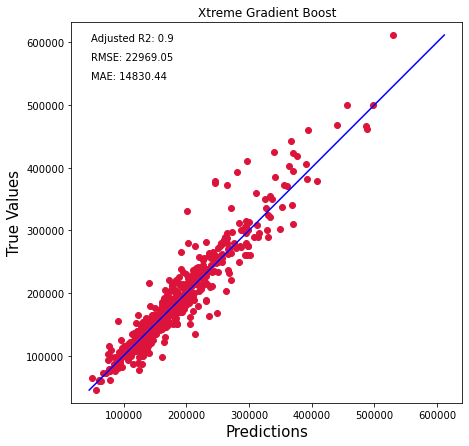

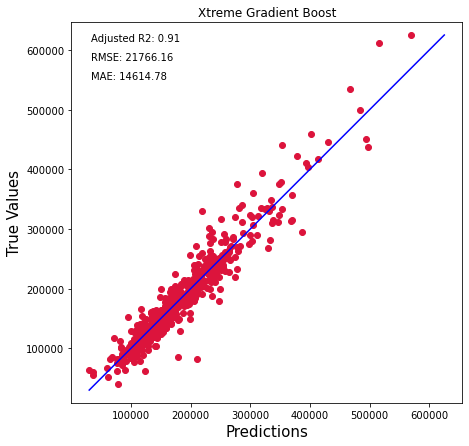

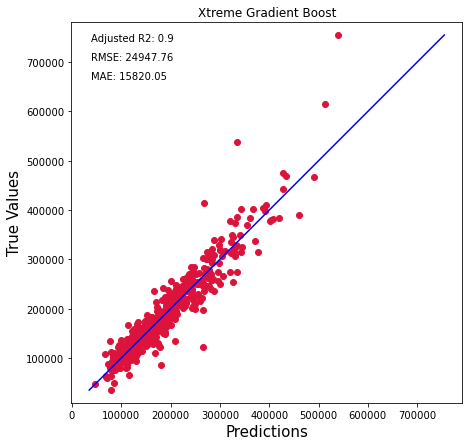

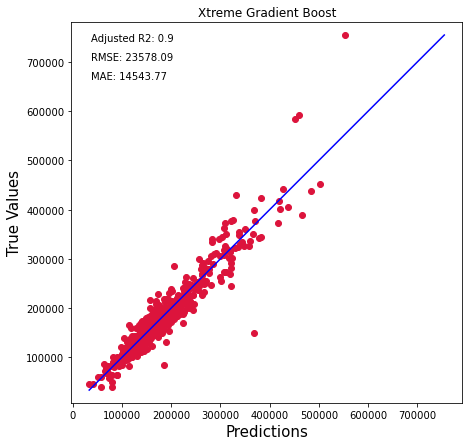

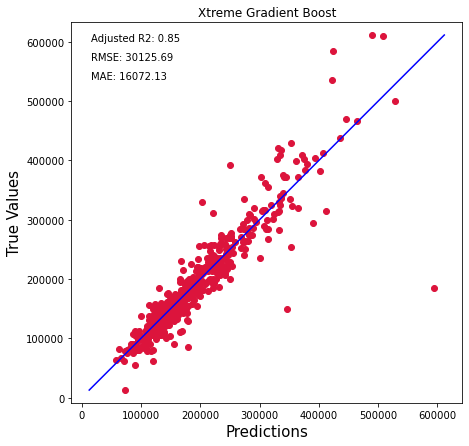

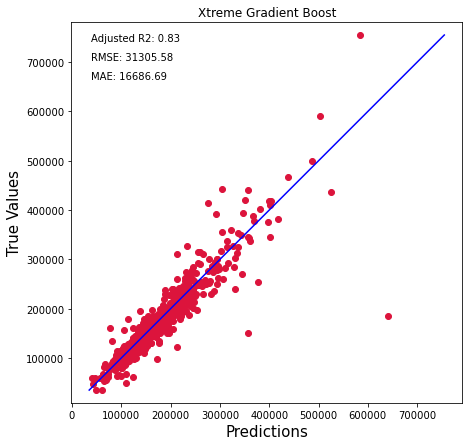

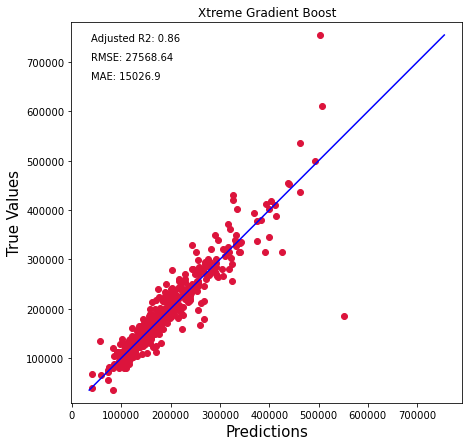

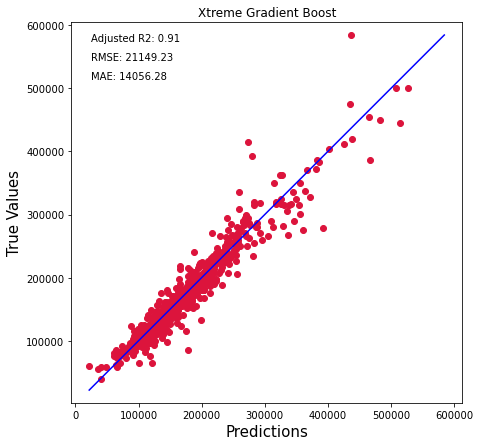

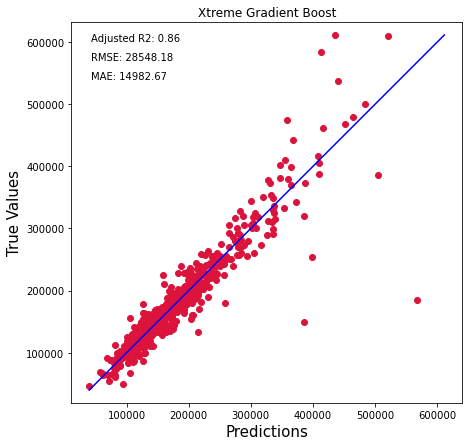

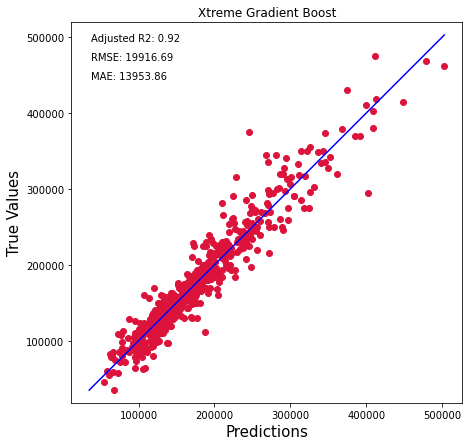

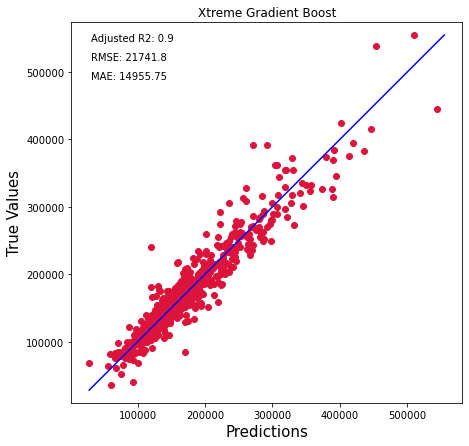

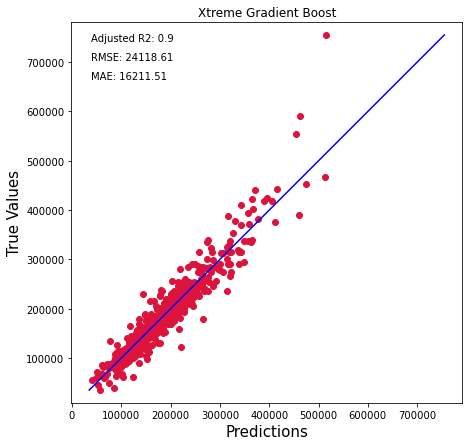

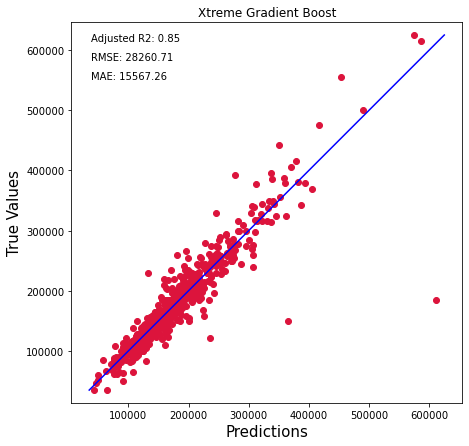

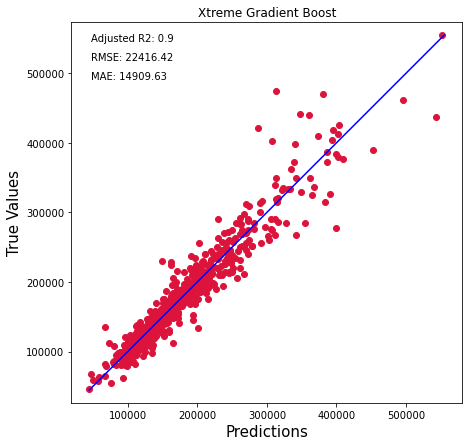

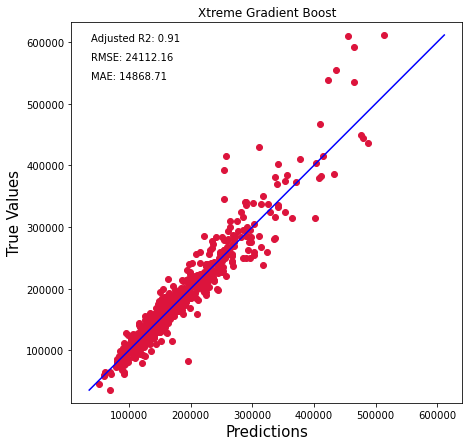

In [7]:
Scores = []
AdjR2 = []
MSE = []
RMSE = []
MAE = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    Scores.append(XGB_Score)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    
    mse = mean_squared_error(Y_test, pred)
    MSE.append(mse)
    
    rmse = np.sqrt(mse)
    RMSE.append(rmse)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE.append(mae)
    
    plt.figure(figsize=(7,7))
    plt.scatter(pred, Y_test, c='crimson')
    
    plt.title('Xtreme Gradient Boost')
    p1 = max(max(pred), max(Y_test))
    p2 = min(min(pred), min(Y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('True Values', fontsize=15)
    plt.axis('equal')
    plt.annotate('Adjusted R2: ' + str(round(Adj_r2,2)), xy=(0.05, 0.95), xycoords='axes fraction')
    plt.annotate('RMSE: ' + str(round(rmse,2)), xy=(0.05, 0.90), xycoords='axes fraction')
    plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction')
    plt.show()
    

In [8]:
combo = pd.DataFrame({'R_Squared': Scores, 'Adjusted_R2': AdjR2, 'Mean Squared Error': MSE,
                      'Root MSE': RMSE, 'Mean Absolute Error': MAE})

In [9]:
combo

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
0,0.904332,0.901190,5.066174e+08,22508.161896,14845.209299
1,0.901405,0.898167,5.612519e+08,23690.755647,15650.608382
2,0.912425,0.909549,5.949533e+08,24391.664329,15103.535096
3,0.872683,0.868502,6.459083e+08,25414.726737,15208.075860
4,0.899816,0.896526,6.100505e+08,24699.199867,15207.931698
5,0.914822,0.912025,4.691318e+08,21659.451050,14861.980596
6,0.886234,0.882498,6.280207e+08,25060.341407,15351.530426
7,0.898577,0.895246,5.506186e+08,23465.263218,14763.904706
8,0.918658,0.915986,5.101401e+08,22586.281426,14188.052556
9,0.902684,0.899488,5.689321e+08,23852.297594,14148.036755


In [16]:
combo.to_csv('XGB.csv', index=False)

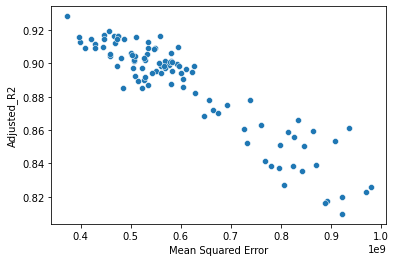

In [10]:
sns.scatterplot(data=combo, x='Mean Squared Error', y='Adjusted_R2'); 

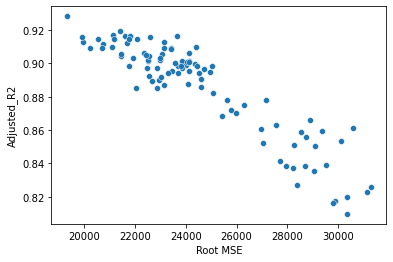

In [11]:
sns.scatterplot(data=combo, x='Root MSE', y='Adjusted_R2'); 

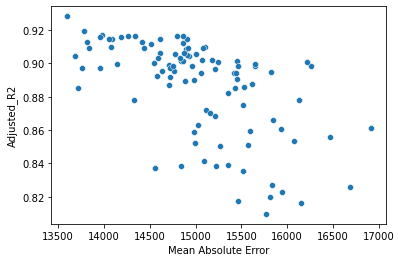

In [12]:
sns.scatterplot(data=combo, x='Mean Absolute Error', y='Adjusted_R2'); 

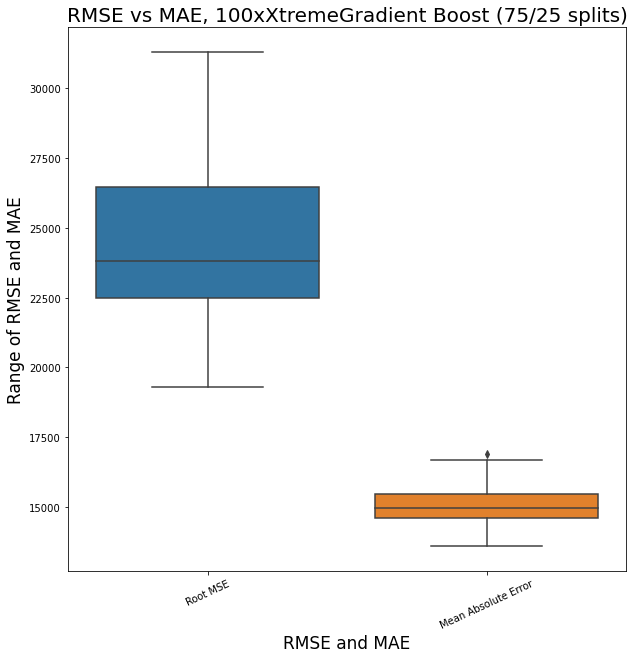

In [13]:
plt.figure(figsize=(10,10))
plt.title('RMSE vs MAE, 100xXtremeGradient Boost (75/25 splits)', fontsize=20)
plt.ylabel('Range of RMSE and MAE', fontsize=17)
plt.xlabel('RMSE and MAE', fontsize=17)
sns.boxplot(data=combo[['Root MSE', 'Mean Absolute Error']])
plt.xticks(rotation=25);

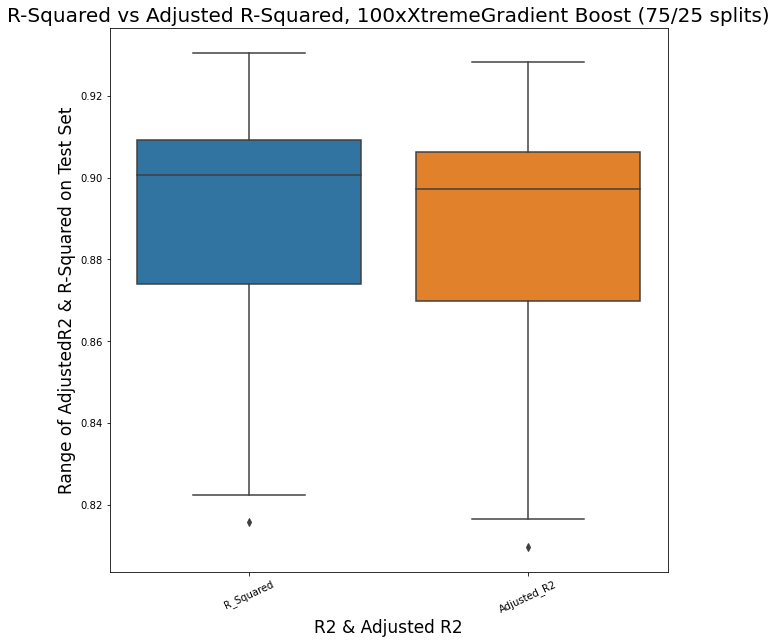

In [14]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xXtremeGradient Boost (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('R2 & Adjusted R2', fontsize=17)
sns.boxplot(data=combo[['R_Squared', 'Adjusted_R2']])
plt.xticks(rotation=25);

In [15]:
combo.describe()

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,0.890091,0.886482,6.094043e+08,24507.320544,15006.765510
std,0.027705,0.028614,1.521024e+08,2980.671724,694.878913
min,0.815825,0.809776,3.724200e+08,19298.187383,13595.037984
25%,0.874052,0.869916,5.059541e+08,22493.415229,14605.145865
50%,0.900532,0.897266,5.678188e+08,23828.948937,14969.205973
75%,0.909166,0.906183,7.008528e+08,26472.137849,15453.914274
max,0.930519,0.928238,9.800395e+08,31305.581818,16913.256498
